# Telco Customer Churn

Download the data [>>here<<](https://www.kaggle.com/blastchar/telco-customer-churn)

    1. become one with the data
    2. set up end-to-end, get dumb baselines
    3. overfit/regularize/tune
    4. package it up!

In [16]:
from collections import Counter

import numpy as np
import pandas as pd
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Create the feature stats for the datasets and stringify it.
import base64
from facets_overview.generic_feature_statistics_generator import GenericFeatureStatisticsGenerator

gfsg = GenericFeatureStatisticsGenerator()
proto = gfsg.ProtoFromDataFrames([{'name': 'telco', 'table': df}])
protostr = base64.b64encode(proto.SerializeToString()).decode("utf-8")

In [4]:
# Display the facets overview visualization for this data
from IPython.core.display import display, HTML

HTML_TEMPLATE = """
        <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html" >
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

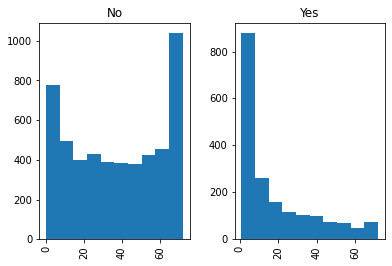

In [5]:
df.hist(column="tenure", by="Churn", density=False);

## Get a dumb baseline

In [10]:
y = (df["Churn"] == "Yes").astype(int)
Counter(y)

Counter({0: 5174, 1: 1869})

In [19]:
X = df["tenure"].to_numpy()[:, None]
X.shape

(7043, 1)

In [20]:
clf = SVC(kernel="linear")
# y_pred = clf.fit_predict(X, y)
clf.fit(X, y)
y_pred = clf.predict(X)

In [22]:
clf.score(X, y)

0.751952293056936

In [23]:
5174 / (5174 + 1869)

0.7346301292063041